In [22]:
# Step 1: Import basic libraries
import numpy as np
import pandas as pd

In [23]:
# Step 2: Load the dataset
df = pd.read_csv("predictive_maintenance.csv")
# Step 3: View first 5 rows
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.shape

(10000, 10)

In [4]:
df.info

<bound method DataFrame.info of         UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  

In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [24]:
# Step 2: Define dependent and independent variables for MLR

X = df[['Air temperature [K]',
        'Process temperature [K]',
        'Rotational speed [rpm]',
        'Torque [Nm]']]

y = df['Tool wear [min]']

In [9]:
# Check shapes
X.shape

(10000, 4)

In [10]:
y.shape

(10000,)

In [11]:
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
0,298.1,308.6,1551,42.8
1,298.2,308.7,1408,46.3
2,298.1,308.5,1498,49.4
3,298.2,308.6,1433,39.5
4,298.2,308.7,1408,40.0


In [12]:
y.head()

0    0
1    3
2    5
3    7
4    9
Name: Tool wear [min], dtype: int64

In [13]:
# Step 3: Correlation analysis for MLR variables

corr_df = df[['Air temperature [K]',
              'Process temperature [K]',
              'Rotational speed [rpm]',
              'Torque [Nm]',
              'Tool wear [min]']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Display correlation matrix
corr_matrix

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000


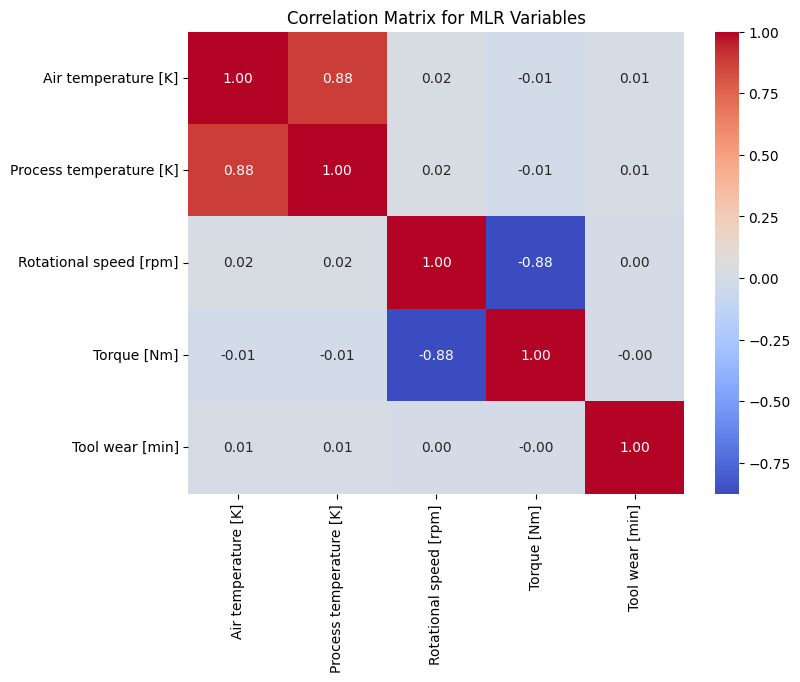

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns  
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for MLR Variables')
plt.show()

In [19]:
corr_df1 = df[['Air temperature [K]',
              'Process temperature [K]',
              'Rotational speed [rpm]',
              'Torque [Nm]',
              'Target']]

# Compute correlation matrix
corr_matrix2 = corr_df1.corr()

# Display correlation matrix
corr_matrix2

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Target
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.082556
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.035946
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,-0.044188
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,0.191321
Target,0.082556,0.035946,-0.044188,0.191321,1.000000


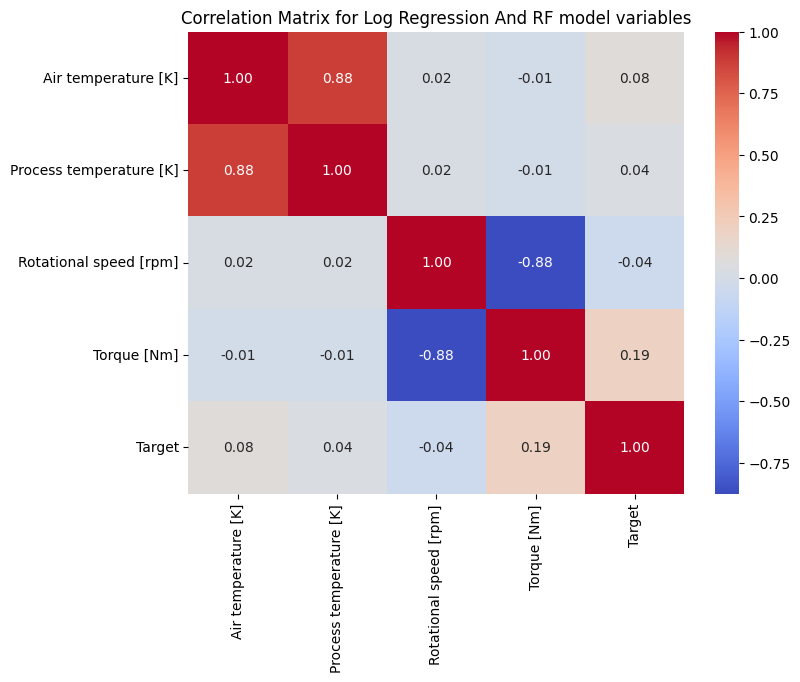

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Log Regression And RF model variables')
plt.show()

In [26]:
# Step 4: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 4), (2000, 4), (8000,), (2000,))

In [28]:
# Step 5: Fit the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression

# Initialize the model
mlr_model = LinearRegression()

# Fit the model on training data
mlr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
mlr_model.intercept_

np.float64(189.5865747418677)

In [30]:
# Coefficients with feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr_model.coef_
})

coefficients

,Feature,Coefficient
0,Air temperature [K],0.325934
1,Process temperature [K],-0.518961
2,Rotational speed [rpm],-0.008591
3,Torque [Nm],-0.129999


In [31]:
# Step 6a: Make predictions on test data
y_pred = mlr_model.predict(X_test)

In [32]:
# Step 6b: Evaluate model performance

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [34]:
print("RMSE =",rmse)

RMSE = 65.37917394764654


In [35]:
print("R2=",r2)

R2= -0.001198736041068571


In [ ]:
#                                                        Logistic Regression

In [36]:
# Logistic Regression - Step 1: Define X and Y

X_log = df[['Air temperature [K]',
            'Process temperature [K]',
            'Rotational speed [rpm]',
            'Torque [Nm]',
            'Tool wear [min]']]

y_log = df['Target']

In [37]:
# Check shapes
X_log.shape, y_log.shape

((10000, 5), (10000,))

In [38]:
# Check class distribution
y_log.value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [39]:
# Percentage distribution
y_log.value_counts(normalize=True) * 100

Target
0    96.61
1     3.39
Name: proportion, dtype: float64

In [40]:
# Logistic Regression - Step 2: Train-test split

from sklearn.model_selection import train_test_split

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log,
    test_size=0.2,
    random_state=42,
    stratify=y_log
)

# Check class balance after split
y_train_log.value_counts(), y_test_log.value_counts()

(Target
 0    7729
 1     271
 Name: count, dtype: int64,
 Target
 0    1932
 1      68
 Name: count, dtype: int64)

In [41]:
# Logistic Regression - Step 3: Feature scaling

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform
X_train_log_scaled = scaler.fit_transform(X_train_log)

# Transform test data using the same scaler
X_test_log_scaled = scaler.transform(X_test_log)

In [42]:
# Check mean and std of scaled training data
X_train_log_scaled.mean(axis=0), X_train_log_scaled.std(axis=0)

(array([ 1.75859327e-15,  1.05346842e-14,  3.01092484e-16, -1.47437618e-16,
        -3.06421555e-17]),
 array([1., 1., 1., 1., 1.]))

In [43]:
# Logistic Regression - Step 4: Model training

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

log_model.fit(X_train_log_scaled, y_train_log)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
# Step 5A: Make predictions
y_pred_log = log_model.predict(X_test_log_scaled)
y_pred_prob_log = log_model.predict_proba(X_test_log_scaled)[:, 1]

In [45]:
# Step 5B: Evaluation metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred_log)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_log, y_pred_log))

# ROC-AUC
roc_auc = roc_auc_score(y_test_log, y_pred_prob_log)
print("ROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[1584  348]
 [  11   57]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1932
           1       0.14      0.84      0.24        68

    accuracy                           0.82      2000
   macro avg       0.57      0.83      0.57      2000
weighted avg       0.96      0.82      0.88      2000

ROC-AUC Score: 0.9079892826695896


In [46]:
print("ROC-AUC Score(accuracy):", roc_auc*100)

ROC-AUC Score(accuracy): 90.79892826695895


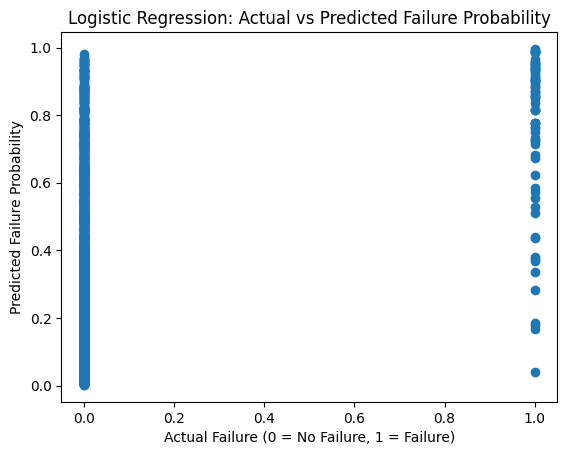

In [47]:

# Actual target values
y_actual = y_test_log.values

# Predicted failure probabilities
y_pred_prob = log_model.predict_proba(
    scaler.transform(X_test_log)
)[:, 1]

# Plot
plt.figure()
plt.scatter(y_actual, y_pred_prob)
plt.xlabel("Actual Failure (0 = No Failure, 1 = Failure)")
plt.ylabel("Predicted Failure Probability")
plt.title("Logistic Regression: Actual vs Predicted Failure Probability")
plt.show()

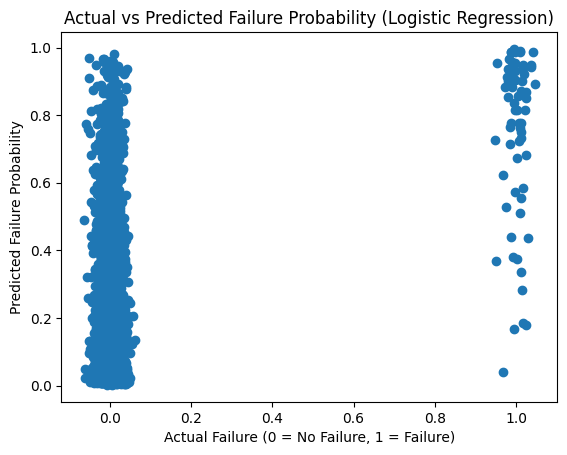

In [48]:
plt.figure()
plt.scatter(
    y_actual + np.random.normal(0, 0.02, size=len(y_actual)),
    y_pred_prob
)
plt.xlabel("Actual Failure (0 = No Failure, 1 = Failure)")
plt.ylabel("Predicted Failure Probability")
plt.title("Actual vs Predicted Failure Probability (Logistic Regression)")
plt.show()


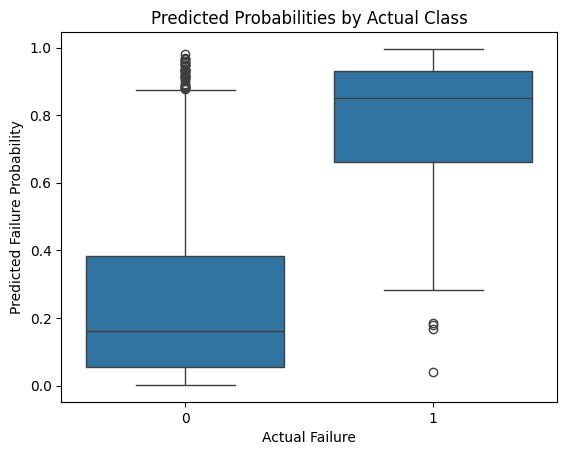

In [49]:
import seaborn as sns

sns.boxplot(x=y_actual, y=y_pred_prob)
plt.xlabel("Actual Failure")
plt.ylabel("Predicted Failure Probability")
plt.title("Predicted Probabilities by Actual Class")
plt.show()


In [52]:
def predict_machine_health(input_data, model, scaler, threshold=0.5):
    """
    input_data : list or 1D array of feature values (same order as training)
    model      : trained logistic regression model
    scaler     : fitted StandardScaler
    threshold  : probability threshold for failure classification
    """

    # Convert input to array and scale
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    # Predict probability
    failure_prob = model.predict_proba(input_scaled)[0][1]

    # Decision logic
    if failure_prob >= threshold:
        decision = "⚠️ HIGH RISK of machine failure"
        action = "Immediate inspection and maintenance recommended"
    else:
        decision = "✅ LOW RISK of machine failure"
        action = "Machine operating normally"

    # English-readable output
    result = {
        "Failure Probability": f"{failure_prob*100:.2f}%",
        "Prediction": decision,
        "Recommended Action": action
    }

    return result


In [53]:
# Example: take first test sample
sample_input = X_test_log.iloc[0].values

prediction_output = predict_machine_health(
    input_data=sample_input,
    model=log_model,
    scaler=scaler,
    threshold=0.5
)

prediction_output

C:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'Failure Probability': '96.72%',
 'Prediction': '⚠️ HIGH RISK of machine failure',
 'Recommended Action': 'Immediate inspection and maintenance recommended'}

In [54]:
def batch_predictions(X, model, scaler, threshold=0.5):
    outputs = []

    for i in range(len(X)):
        result = predict_machine_health(
            X.iloc[i].values,
            model,
            scaler,
            threshold
        )
        outputs.append(result)

    return outputs

# Example: first 5 machines
batch_predictions(X_test_log.head(5), log_model, scaler)

C:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Python\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[{'Failure Probability': '96.72%',
  'Prediction': '⚠️ HIGH RISK of machine failure',
  'Recommended Action': 'Immediate inspection and maintenance recommended'},
 {'Failure Probability': '49.67%',
  'Prediction': '✅ LOW RISK of machine failure',
  'Recommended Action': 'Machine operating normally'},
 {'Failure Probability': '64.51%',
  'Prediction': '⚠️ HIGH RISK of machine failure',
  'Recommended Action': 'Immediate inspection and maintenance recommended'},
 {'Failure Probability': '1.39%',
  'Prediction': '✅ LOW RISK of machine failure',
  'Recommended Action': 'Machine operating normally'},
 {'Failure Probability': '89.02%',
  'Prediction': '⚠️ HIGH RISK of machine failure',
  'Recommended Action': 'Immediate inspection and maintenance recommended'}]

In [36]:
X_test.count()

Air temperature [K]        2000
Process temperature [K]    2000
Rotational speed [rpm]     2000
Torque [Nm]                2000
dtype: int64

In [ ]:
#                                                Random Forest (Non Parametric model)

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,        # number of trees
    max_depth=None,          # let trees grow fully
    class_weight="balanced", # handle class imbalance
    random_state=42,
    n_jobs=-1                # use all CPU cores
)

In [38]:
# Random Forest - Step 2: Model training

rf_model.fit(X_train_log, y_train_log)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
# Random Forest - Step 3A: Predictions

y_pred_rf = rf_model.predict(X_test_log)
y_pred_prob_rf = rf_model.predict_proba(X_test_log)[:, 1]

In [40]:
# Random Forest - Step 3B: Evaluation

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Confusion Matrix
cm_rf = confusion_matrix(y_test_log, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_log, y_pred_rf))

# ROC-AUC
roc_auc_rf = roc_auc_score(y_test_log, y_pred_prob_rf)
print("ROC-AUC Score:", roc_auc_rf)

Confusion Matrix:
 [[1927    5]
 [  29   39]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.89      0.57      0.70        68

    accuracy                           0.98      2000
   macro avg       0.94      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000

ROC-AUC Score: 0.9619793569601754


In [42]:
print('ROC _ AUC Score:',roc_auc_rf*100)

ROC _ AUC Score: 96.19793569601754


In [ ]:
#      Random Forest Confusion Matrix Values
# | Metric | Meaning                     | Count  |
# | ------ | --------------------------- | ------ |
# | TN     | Correct no-failure          | 1927   |
# | FP     | False alarms                | **5**  |
# | FN     | Missed failures ⚠️         | **29** |
# | TP     | Correctly detected failures| 39     |
# Recall for 0(no failure) --------------1.00 
# Recall for 1(failure) -----------------0.57
#ROC _ AUC Score: 96.19793569601754

In [ ]:
#      Log Regression Confusion Matrix Values
# | Outcome | Meaning                        | Count  |
# | ------- | ------------------------------ | ------ |
# | TN      | Correctly predicted no-failure | 1584   |
# | FP      | False alarms                   | 348    |
# | FN      | Missed failures ⚠️            | **11** |
# | TP      | Correctly detected failures ✅| **57** |
# Recall for 0(no failure) ------------------0.82
# Recall for 1(failure) ---------------------0.84 
# ROC-AUC Score(accuracy): 90.79892826695895